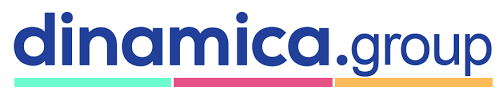</b> <br>Consultor: Peterson Almeida <br>



<h1> Estrutura Pandas </h1>

<b> Geral:</b><br>
Pandas é uma biblioteca python que trabalha com um Dataframe (uma estrutura muito similar a uma tabela de banco de dados).

<br> 

<h3> Series </h3>

In [3]:
import pandas as pd
import numpy as np


In [4]:
series = pd.Series(np.arange(0,10,2))
series

0    0
1    2
2    4
3    6
4    8
dtype: int32

In [5]:
ser = pd.Series(data=series.values, index=['a', 'b', 'c','d','e'])
ser

a    0
b    2
c    4
d    6
e    8
dtype: int32

In [6]:
ser['c']

4

In [7]:
ser.dtype

dtype('int32')

In [8]:
print(ser.index)
print(ser.values)


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[0 2 4 6 8]


In [9]:
ser.iloc[-1]

8

In [10]:
ser.loc['e']

8

In [11]:
ser.shape

(5,)

<h3>DataFrame</h3>

In [12]:
df = pd.DataFrame({'idade':[43,30,21,43,21],'nome':['Fulano','Ciclano','Beltrano','Fulana','Ciclana']})
df.head()

,idade,nome
0,43,Fulano
1,30,Ciclano
2,21,Beltrano
3,43,Fulana
4,21,Ciclana


In [13]:
df.shape

(5, 2)

In [14]:
df.dtypes

idade     int64
nome     object
dtype: object

In [15]:
df.describe()

,idade
count,5.000000
mean,31.600000
std,11.036304
min,21.000000
25%,21.000000
50%,30.000000
75%,43.000000
max,43.000000


In [16]:
df[df['idade']==21]

,idade,nome
2,21,Beltrano
4,21,Ciclana


In [17]:
print(df.columns)
print(df.values)

Index(['idade', 'nome'], dtype='object')
[[43 'Fulano']
 [30 'Ciclano']
 [21 'Beltrano']
 [43 'Fulana']
 [21 'Ciclana']]


<AxesSubplot:>

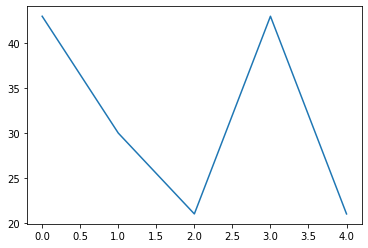

In [18]:
df['idade'].plot()

In [19]:
df.loc[0:2]

,idade,nome
0,43,Fulano
1,30,Ciclano
2,21,Beltrano


In [20]:
df.iloc[3:]

,idade,nome
3,43,Fulana
4,21,Ciclana


In [21]:
df.idade.sum()

158

In [22]:
df['nome'].value_counts()

Ciclano     1
Fulana      1
Ciclana     1
Fulano      1
Beltrano    1
Name: nome, dtype: int64

In [23]:
df['idade'].max()

43

In [24]:
df.isnull()

,idade,nome
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idade   5 non-null      int64 
 1   nome    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [26]:
df['idade'][df['idade']==21]=33
df.head()

<ipython-input-26-7fde03e9cf0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['idade'][df['idade']==21]=33


,idade,nome
0,43,Fulano
1,30,Ciclano
2,33,Beltrano
3,43,Fulana
4,33,Ciclana


In [27]:
df.query('idade > 35')

,idade,nome
0,43,Fulano
3,43,Fulana


In [28]:
df.rename({'idade':'Idade'},inplace=True, axis='columns')
df.tail()

,Idade,nome
0,43,Fulano
1,30,Ciclano
2,33,Beltrano
3,43,Fulana
4,33,Ciclana


In [29]:
df.set_index('nome',inplace=True)
df.head()

,Idade
nome,
Fulano,43
Ciclano,30
Beltrano,33
Fulana,43
Ciclana,33


In [30]:
df.loc['Fulana']

Idade    43
Name: Fulana, dtype: int64

In [31]:
for a,b in zip(df.index,df.values):
  print(a,b)

Fulano [43]
Ciclano [30]
Beltrano [33]
Fulana [43]
Ciclana [33]


In [32]:
for a,b in zip(df.index,df.values):
  print(a,b[0])

Fulano 43
Ciclano 30
Beltrano 33
Fulana 43
Ciclana 33


In [33]:
df.dtypes

Idade    int64
dtype: object

<h3> Exercícios</b>

1. Crie um Data Frame com 10 linhas e colunas contendo nome, idade, cidade e cep.

In [34]:
dados = pd.DataFrame({'nome':['Alisson','Angelo','Artur','Cloris','Clara','Masha','Safira','Nala','Bia','Arlindo'],'idade':[27,28,26,50,8,6,4,3,24,62],'cidade':['Belo Horizonte','Betim','São Paulo','Virginópolis','Virginópolis','Rio de Janeiro','Itabira','Belo Horizonte','Betim','Montes Claros'],'cep':['31998-320','34852-580','15202-987','33521-880','11432-471','13452-854','63289-834','69852-181','33652-986','25685-662']})
display(dados)

,nome,idade,cidade,cep
0,Alisson,27,Belo Horizonte,31998-320
1,Angelo,28,Betim,34852-580
2,Artur,26,São Paulo,15202-987
3,Cloris,50,Virginópolis,33521-880
4,Clara,8,Virginópolis,11432-471
5,Masha,6,Rio de Janeiro,13452-854
6,Safira,4,Itabira,63289-834
7,Nala,3,Belo Horizonte,69852-181
8,Bia,24,Betim,33652-986
9,Arlindo,62,Montes Claros,25685-662


2. Conte quantas pessoas vivem em cada cidade e qual é a média de idade das pessoas.

In [35]:
print(dados['cidade'].value_counts())


media = dados['idade'].sum() / len(dados['idade'])
print('---'*30)
print('A média das idades é {}'.format(media))

Betim             2
Belo Horizonte    2
Virginópolis      2
Rio de Janeiro    1
São Paulo         1
Itabira           1
Montes Claros     1
Name: cidade, dtype: int64
------------------------------------------------------------------------------------------
A média das idades é 23.8


3. Calcule a média de idade das pessoas por cidade.

In [40]:

means = dados.groupby('cidade')['idade'].mean()
print(means)


cidade
Belo Horizonte    15
Betim             26
Itabira            4
Montes Claros     62
Rio de Janeiro     6
São Paulo         26
Virginópolis      29
Name: idade, dtype: int64
